## Computer Vision Assignment 5
# SIFT
### CS20B1012
### Muhammad Fazil K

#### Importing Modules

In [1]:
import cv2 
import re
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import math

#sift function 
sift = cv2.SIFT_create()

#### Function to load images

In [2]:
def load_images_from_folder(folder):
    images = []
    folder =f'face_{folder}'
    for file_name in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file_name))
        if img is not None:
            images.append(img)
    return images

#### Obtaining Discriptors

In [4]:
def desc_func(class_name):

    # directory_path = rf"sift_cv"
    # os.chdir(directory_path)

    images = load_images_from_folder(class_name)

    #storing keypoints and descriptor for training data
    keypoint = []
    descriptor = []
    for img in images:
        keypoints, descriptors = sift.detectAndCompute(img,None)
        keypoint.append(keypoints)
        descriptor.append(descriptors)

    # Stack descriptors
    descriptor_flat = np.vstack(descriptor)

    return descriptor_flat

#### Class Labels

In [5]:
class_label = ['pranay', 'habel','anish', 'vismay', 'adarsh', 'george', 'afnan', 'vyshnav', 'soorya', 'fazil']
class_desc = {}
for i in class_label:
    class_desc[i] = desc_func(i)

#### Testing 

d:\SIFT\sift_cv\test_data


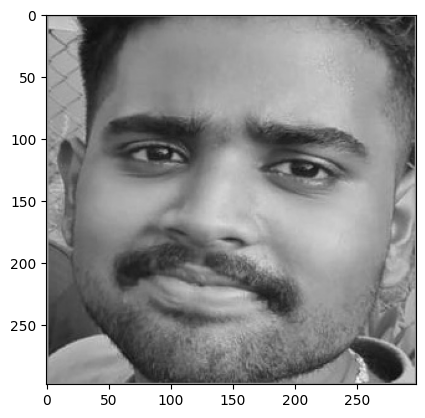

This person is most similar to fazil

Checking for original class...
The classification was incorrect :(



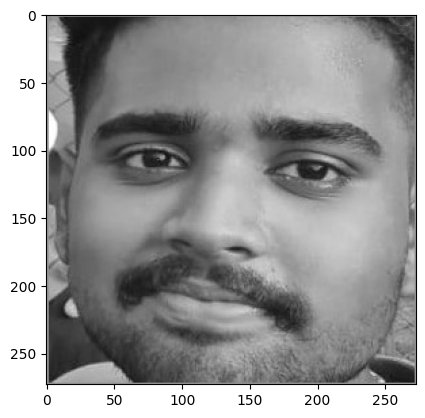

This person is most similar to habel

Checking for original class...
The classification was incorrect :(



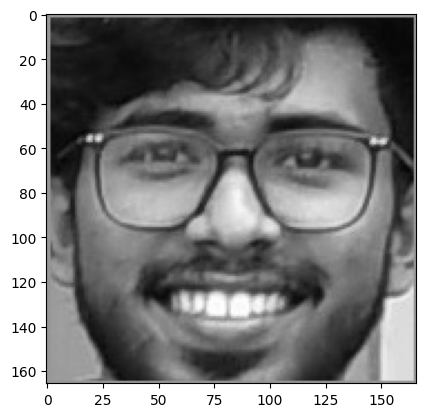

This person is most similar to afnan

Checking for original class...
The classification was correct :)



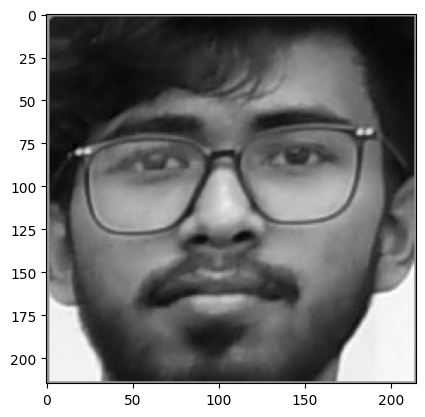

This person is most similar to afnan

Checking for original class...
The classification was correct :)



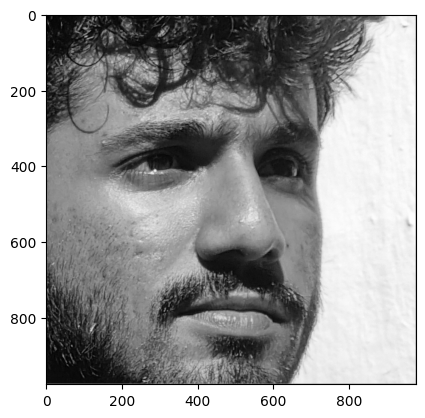

This person is most similar to anish

Checking for original class...
The classification was correct :)



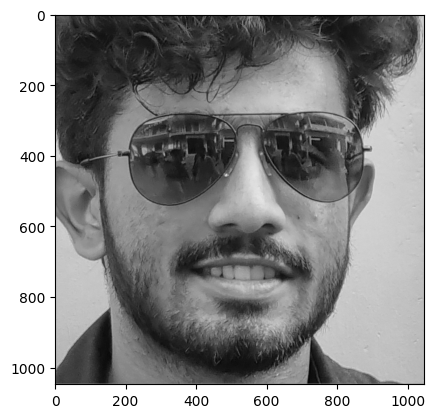

This person is most similar to anish

Checking for original class...
The classification was correct :)



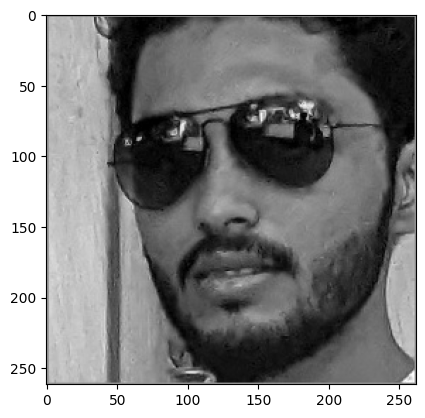

This person is most similar to adarsh

Checking for original class...
The classification was incorrect :(



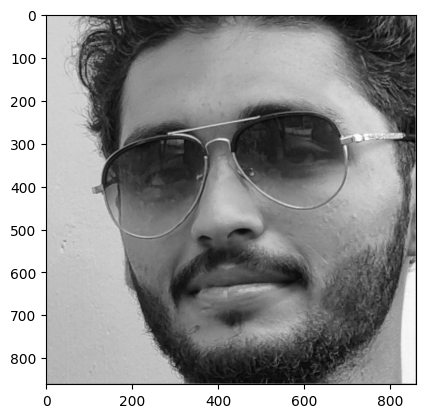

This person is most similar to fazil

Checking for original class...
The classification was correct :)



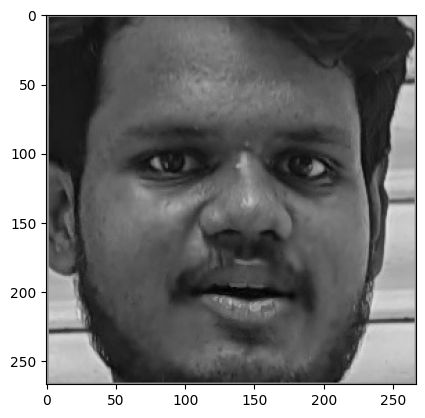

This person is most similar to george

Checking for original class...
The classification was correct :)



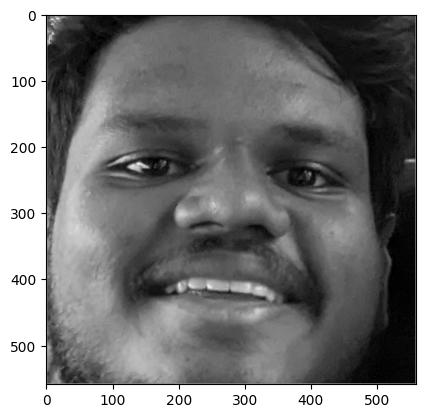

This person is most similar to george

Checking for original class...
The classification was correct :)



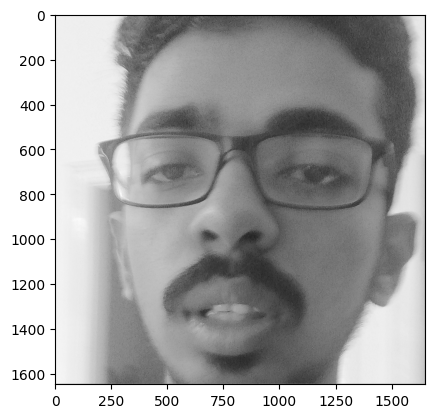

This person is most similar to vismay

Checking for original class...
The classification was incorrect :(



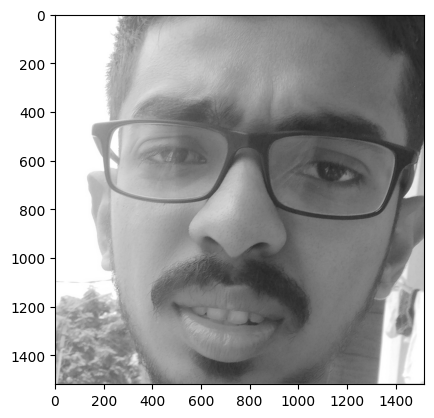

This person is most similar to habel

Checking for original class...
The classification was correct :)



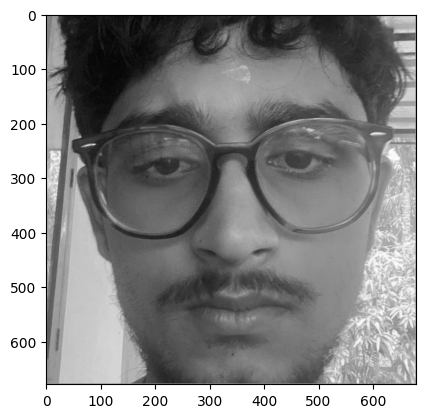

This person is most similar to pranay

Checking for original class...
The classification was correct :)



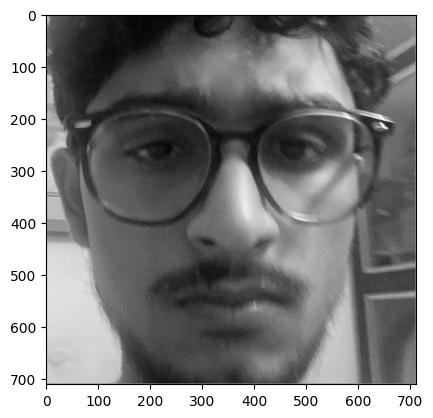

This person is most similar to pranay

Checking for original class...
The classification was correct :)



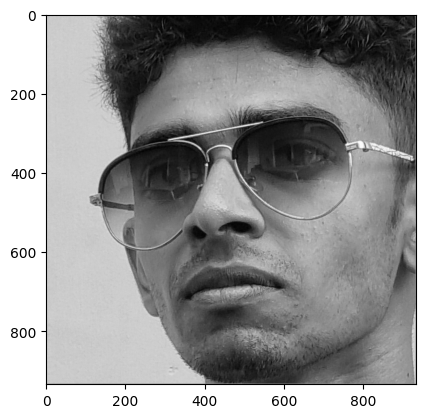

This person is most similar to soorya

Checking for original class...
The classification was correct :)



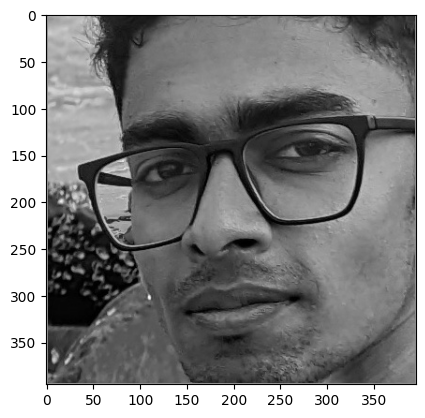

This person is most similar to soorya

Checking for original class...
The classification was correct :)



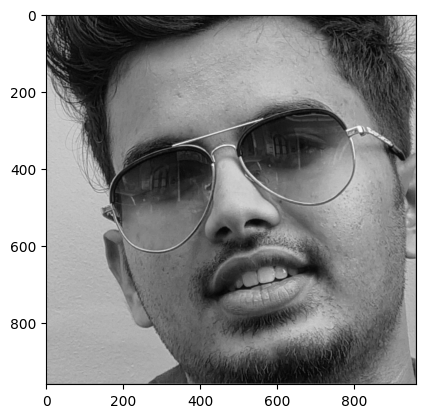

This person is most similar to vismay

Checking for original class...
The classification was correct :)



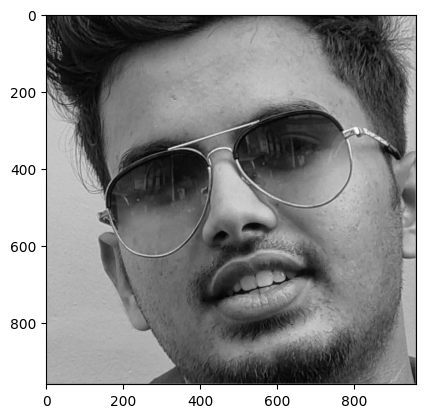

This person is most similar to vismay

Checking for original class...
The classification was correct :)



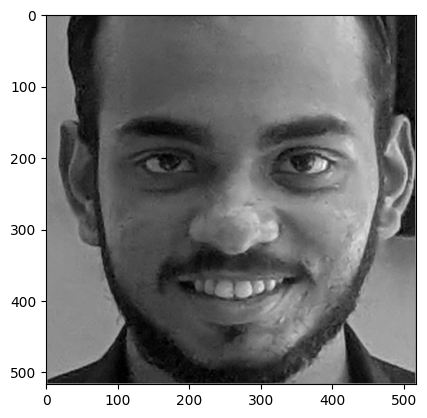

This person is most similar to vyshnav

Checking for original class...
The classification was correct :)



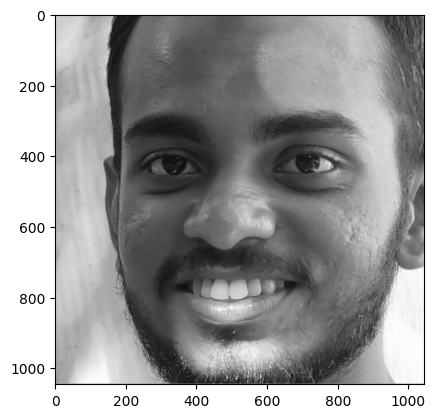

This person is most similar to vyshnav

Checking for original class...
The classification was correct :)


Accuracy : 80.0 %


In [7]:
current_directory = os.getcwd()
print(current_directory)
if current_directory != rf"d:\SIFT\sift_cv\test_data":
    directory_path = rf"d:\SIFT\sift_cv\test_data"
    os.chdir(directory_path) 
    
Correct=0
inCorrect =0
for filename in os.listdir():

    query_image = cv2.imread(filename)
    plt.imshow(query_image)
    plt.show()
    
    query_kp, query_desc = sift.detectAndCompute(query_image, None)

    bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck=False)
    query_class = ""
    query_max = 0
    for i in class_label:
        matches = bf.knnMatch(query_desc,class_desc[i], k=2)
        good = []
        for m,n in matches:
            if m.distance < 0.7*n.distance:   #Threshold determines the accuracy
                good.append(m)
        # print(f"{i} {len(good)}")      ---Uncomment this line to print the number of matches
        if(len(good) > query_max):
            query_class = i
            query_max = len(good)

    print(f"This person is most similar to {query_class}\n")
    print("Checking for original class...")
    

    if query_class in filename:
        print("The classification was correct :)\n")
        Correct+=1
    else :
        print("The classification was incorrect :(\n")
        inCorrect+=1
acc = 100 * (Correct / (Correct+ inCorrect))
print(f"\nAccuracy : {acc} %")
        
    